In [53]:
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Reading data

In [54]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [55]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Generate Descriptive Statistics and Visualizations

## Task1 
### For the "Median value of owner-occupied homes" provide a boxplot
As we se on the boxplot, there are a lot of outliers and a lot of data is concentrated close to median, while quentiles are far away. This suggest that data is combination of two types: 1. Some very common values around median and 2. Wide spreaded data. 

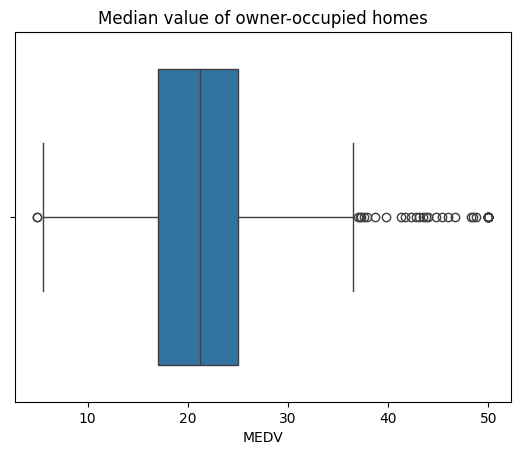

In [56]:
sns.boxplot(x = 'MEDV', data=boston_df)
plt.title("Median value of owner-occupied homes")
plt.show()

## Task 2
### Charles river variable
Most of the data is category 0 so we should be carefull because we can have baias in conclusions.

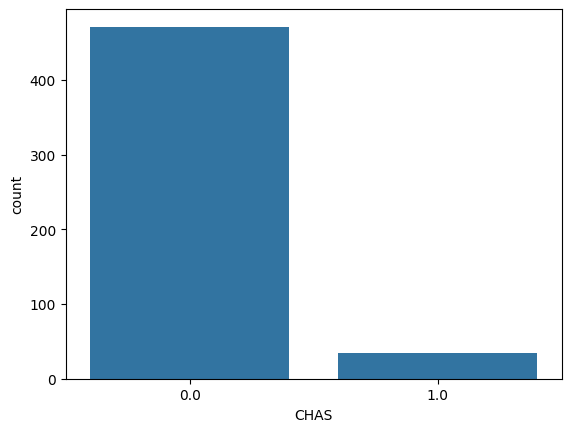

In [57]:
sns.countplot(x = 'CHAS', data = boston_df)
plt.show()

## Task 3
### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
We see that generally MEDV median is lower with age. 

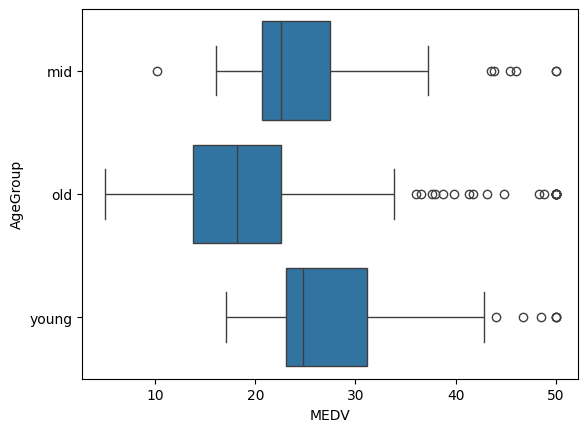

In [58]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AgeGroup'] = 'young'
boston_df.loc[(35 < boston_df['AGE']) & (boston_df['AGE'] < 70), 'AgeGroup'] = 'mid'
boston_df.loc[(boston_df['AGE'] >= 70), 'AgeGroup'] = 'old'
sns.boxplot(x = 'MEDV', y="AgeGroup", data=boston_df)
plt.show()

## Task 4
### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
We see possible corelation with low INDUS and low NOX values. As values go up the relationship is weaker and correlation seems dissaper. We can possibly divide data into low-values and high vlaues sets to extract better metrics.

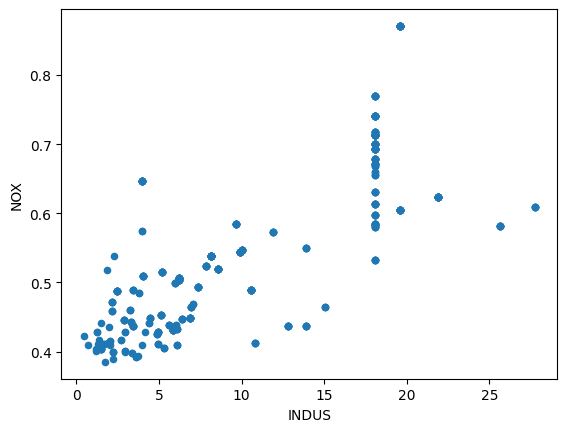

In [59]:
boston_df.plot.scatter(y="NOX", x="INDUS")
plt.show()

## Task 5
### Create a histogram for the pupil to teacher ratio variable
We see that pupil to teacher ratio distribution is highly skewed right. 

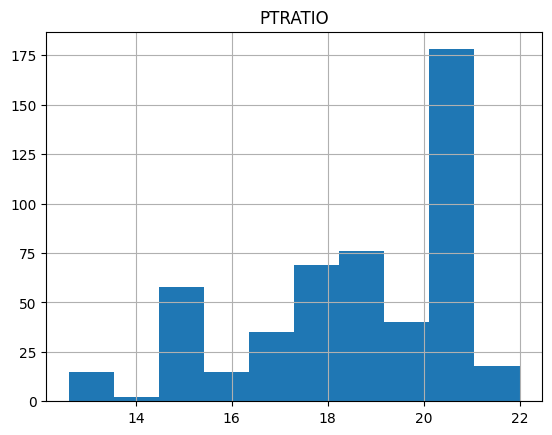

In [60]:
boston_df.hist("PTRATIO")
plt.show()

# Tests for Statistics

## Task 6
### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

H0: "there is no difference in median value of houses bounded by the Charles river"

H1: "there is a difference in median value of houses bounded by the Charles river"


In [61]:
stats.ttest_ind(boston_df['MEDV'], boston_df['CHAS'])

TtestResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305, df=1010.0)

Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in in median value of houses bounded by the Charles river

## Task 7
### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

We will use the same age groups as in Task 3. 



In [62]:
# Test for equality of variance

young = boston_df[boston_df['AgeGroup'] == "young"]['MEDV']
mid = boston_df[boston_df['AgeGroup'] == "mid"]['MEDV']
old = boston_df[boston_df['AgeGroup'] == "old"]['MEDV']

stats.levene(young, mid, old, center="mean")

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [63]:
stats.f_oneway(young, mid, old)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).

## Task 8
### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

H0: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

H1: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


In [64]:
stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

Since the p-value is less than 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

## Task 9
### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

H0: beta = 0 (There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes)

H1: beta not equal to 0 (There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes)

In [65]:
x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predisction = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           1.21e-08
Time:                        11:36:01   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Like the t-test, the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. The coefficient is positive.